In [1]:
#Make sure to update this list as needed!
project_names = ["prelim_yeet", "professional_development", "yonder_youlab"]
today_date = '2022-05-27'

# Time Report 05-23-22

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lst = []
for pn in project_names:
    filename = "C:\\Users\\aphin\\Downloads\\{}_time_tracking.csv".format(pn)
    lst.append(pd.read_csv(filename))
    
df = pd.concat(lst, axis=0, ignore_index=True)

In [3]:
from datetime import datetime
from datetime import timedelta
week_ago = datetime.strptime(today_date, '%Y-%m-%d') - timedelta(days = 7)
df['Date2'] = pd.to_datetime(df['Date'])
df = df[df['Date2'] > week_ago] #filter. report only this week. 

In [4]:
def hrs_to_hrs(str):
    hrminsec = str.split(':')
    num_hrs = 1 * int(hrminsec[0]) + 1/60 * int(hrminsec[1]) + 1/3600 * int(hrminsec[2])
    return num_hrs
    
df['Hours'] = df['Hours'].apply(hrs_to_hrs)

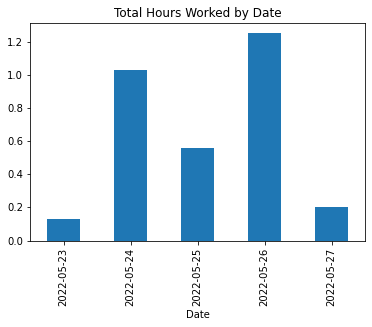

In [5]:
hrs_by_date = pd.pivot_table(df, values = 'Hours', index = 'Date')
hrs_by_date.reset_index(inplace = True);
hrs_by_date.plot.bar(x = 'Date', y = 'Hours', legend=None); plt.title("Total Hours Worked by Date");

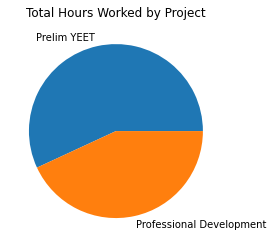

In [6]:
hrs_by_proj = pd.pivot_table(df, values = 'Hours', index = 'Project')
hrs_by_proj.plot.pie(x = 'Project', y = 'Hours', legend=None); plt.title("Total Hours Worked by Project");  plt.ylabel('');

In [7]:
#In the future, will need to update these blocks when change tags or projects. 
what_tags = ['Alternative NNs', 'Communication', 'Experiments', 'Mech model', 'Pix2pix', 'Transfer learning']
who_tags = ['Data+ team', 'Yao team', 'Tarokh team'] 
importance_tags = ['Ehh, okay to not finish by prelim', 'Need to have by prelim',
                   'Quite want before prelim', 'Reeeeeally want before prelim']
difficulty_tags = ['High difficulty', 'Medium difficulty', 'Low difficulty']

In [8]:
%%capture --no-display 
prelim_only = df[df['Project'] ==  'Prelim YEET']
prelim_only['Tags_lst'] = prelim_only['Tags'].apply(lambda str: str.split(','))
prelim_only['what_tags'] = prelim_only['Tags_lst'].apply(lambda lst: "".join([v.strip() for v in lst if v.strip() in what_tags]))
prelim_only['who_tags'] = prelim_only['Tags_lst'].apply(lambda lst: "".join([v.strip() for v in lst if v.strip() in who_tags]))
prelim_only['importance_tags'] = prelim_only['Tags_lst'].apply(lambda lst: "".join([v.strip() for v in lst if v.strip() in importance_tags]))
prelim_only['difficulty_tags'] = prelim_only['Tags_lst'].apply(lambda lst: "".join([v.strip() for v in lst if v.strip() in difficulty_tags]))

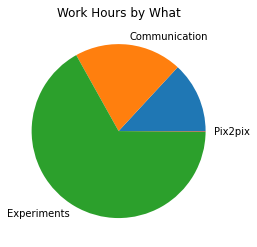

In [9]:
tag_temp = pd.pivot_table(prelim_only, values = 'Hours', index = 'what_tags')
tag_temp.plot.pie(x = 'what_tags', y = 'Hours', legend = None); plt.title("Work Hours by What"); plt.ylabel('');

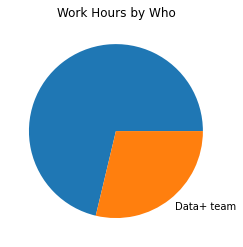

In [10]:
tag_temp = pd.pivot_table(prelim_only, values = 'Hours', index = 'who_tags')
tag_temp.plot.pie(x = 'who_tags', y = 'Hours', legend = None); plt.title("Work Hours by Who"); plt.ylabel('');

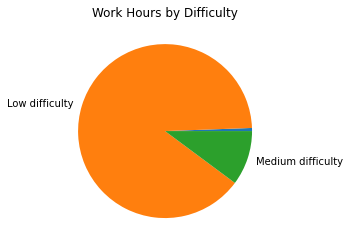

In [11]:
tag_temp = pd.pivot_table(prelim_only, values = 'Hours', index = 'difficulty_tags')
tag_temp.plot.pie(x = 'difficulty_tags', y = 'Hours', legend = None); plt.title("Work Hours by Difficulty"); plt.ylabel('');

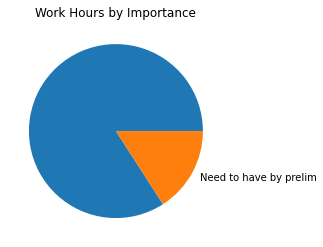

In [12]:
tag_temp = pd.pivot_table(prelim_only, values = 'Hours', index = 'importance_tags')
tag_temp.plot.pie(x = 'importance_tags', y = 'Hours', legend = None); plt.title("Work Hours by Importance"); plt.ylabel('');

In [13]:
#maybe later. not today. 
# prodev_only = df[df['Project'] ==  'Professional Development']
# hrs_by_tag_1 = pd.pivot_table(prodev_only, values = 'Hours', index = 'Tags')
# hrs_by_tag_1 #.plot.pie(y ='Hours', legend = None); plt.title("Pro Dev Hours by Topic"); plt.ylabel('');

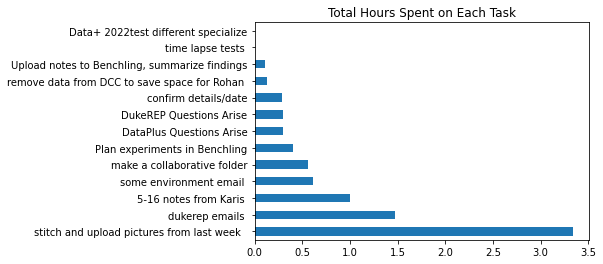

In [14]:
hrs_by_task = pd.pivot_table(df, values = 'Hours', index = 'Task')
hrs_by_task.reset_index(inplace = True)
hrs_by_task = hrs_by_task.sort_values(by=['Hours'])
ax = hrs_by_task.plot.barh(x = 'Task', y = 'Hours', legend = None); plt.ylabel(''); ax.invert_yaxis();
plt.title("Total Hours Spent on Each Task");

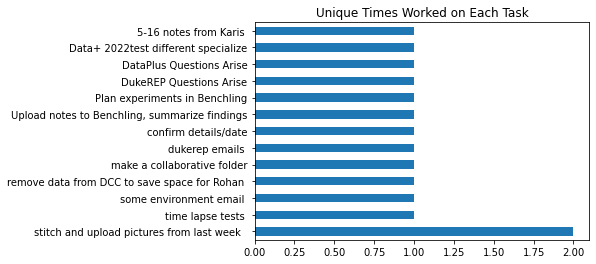

In [17]:
tims_by_task = pd.pivot_table(df, index = 'Task', values = 'Project', aggfunc = 'count') # project is arbitrary
tims_by_task.reset_index(inplace = True)
tims_by_task = tims_by_task.sort_values(by=['Project'])
ax = tims_by_task.plot.barh(x = 'Task', y = 'Project', legend = None); plt.ylabel(''); ax.invert_yaxis();
plt.title("Unique Times Worked on Each Task");